In [1]:
import numpy as np
import pandas as pd, datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
df=pd.read_excel("Airlines+Data.xlsx", parse_dates=True,squeeze=True)

In [3]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
dates = pd.date_range(start='1955-01-01', freq='MS',periods=len(df))
dates

DatetimeIndex(['1955-01-01', '1955-02-01', '1955-03-01', '1955-04-01',
               '1955-05-01', '1955-06-01', '1955-07-01', '1955-08-01',
               '1955-09-01', '1955-10-01', '1955-11-01', '1955-12-01',
               '1956-01-01', '1956-02-01', '1956-03-01', '1956-04-01',
               '1956-05-01', '1956-06-01', '1956-07-01', '1956-08-01',
               '1956-09-01', '1956-10-01', '1956-11-01', '1956-12-01',
               '1957-01-01', '1957-02-01', '1957-03-01', '1957-04-01',
               '1957-05-01', '1957-06-01', '1957-07-01', '1957-08-01',
               '1957-09-01', '1957-10-01', '1957-11-01', '1957-12-01',
               '1958-01-01', '1958-02-01', '1958-03-01', '1958-04-01',
               '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01',
               '1958-09-01', '1958-10-01', '1958-11-01', '1958-12-01',
               '1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
      

In [5]:
df['Month'] = dates.month
df['Year'] = dates.year
df.head()

,Month,Passengers,Year
0,1,112,1955
1,2,118,1955
2,3,132,1955
3,4,129,1955
4,5,121,1955


In [6]:
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df.rename({'Passengers':'Passengers'},axis=1,inplace=True)
df = df[['Month','Year','Passengers']]
df.head()

,Month,Year,Passengers
0,Jan,1955,112
1,Feb,1955,118
2,Mar,1955,132
3,Apr,1955,129
4,May,1955,121


# Visualisation

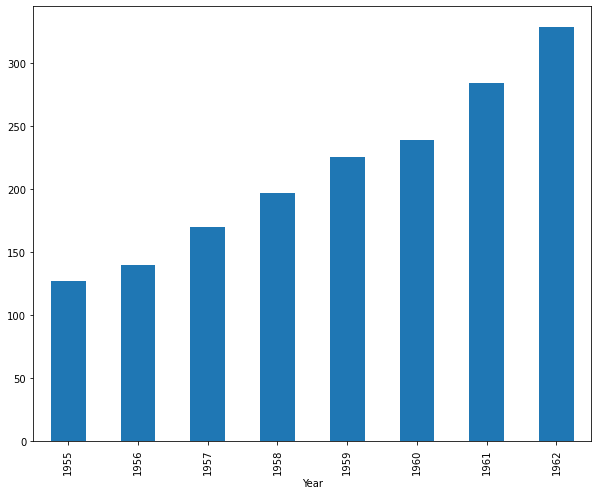

In [7]:
plt.figure(figsize=(10,8))
df.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

From the above figure we can see that passengers are increasing with the increase in the year

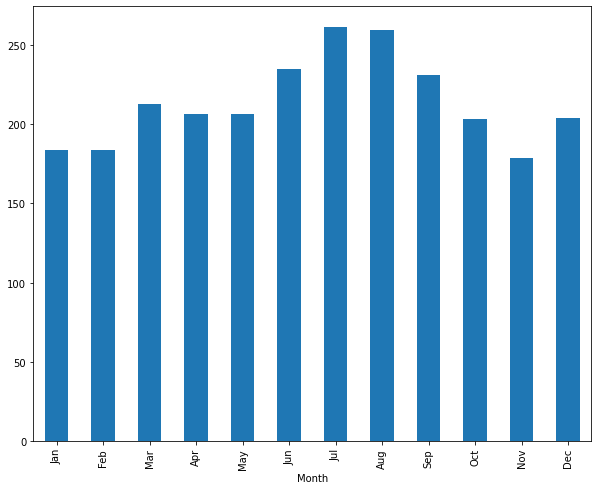

In [8]:
plt.figure(figsize=(10,8))
df.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

From the above figure we can see that more passengers can be seen between months June to September

<AxesSubplot:xlabel='Month', ylabel='Year'>

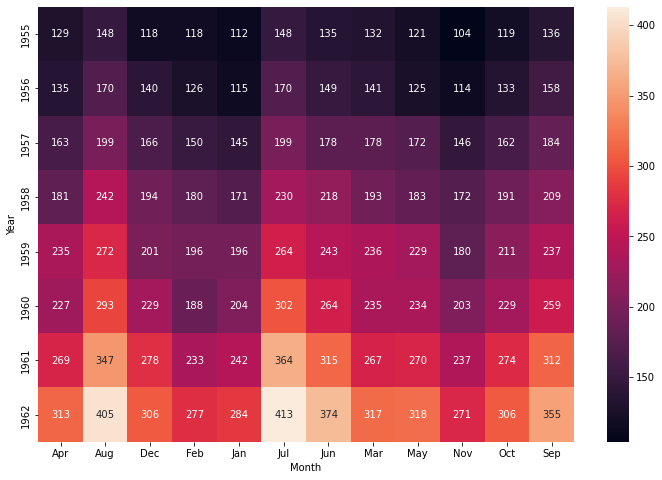

In [9]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


In [10]:
df

,Month,Year,Passengers
0,Jan,1955,112
1,Feb,1955,118
2,Mar,1955,132
3,Apr,1955,129
4,May,1955,121
...,...,...,...
91,Aug,1962,405
92,Sep,1962,355
93,Oct,1962,306
94,Nov,1962,271


# Time-Series Decomposition to understand the trend and seasonality 

# Trend

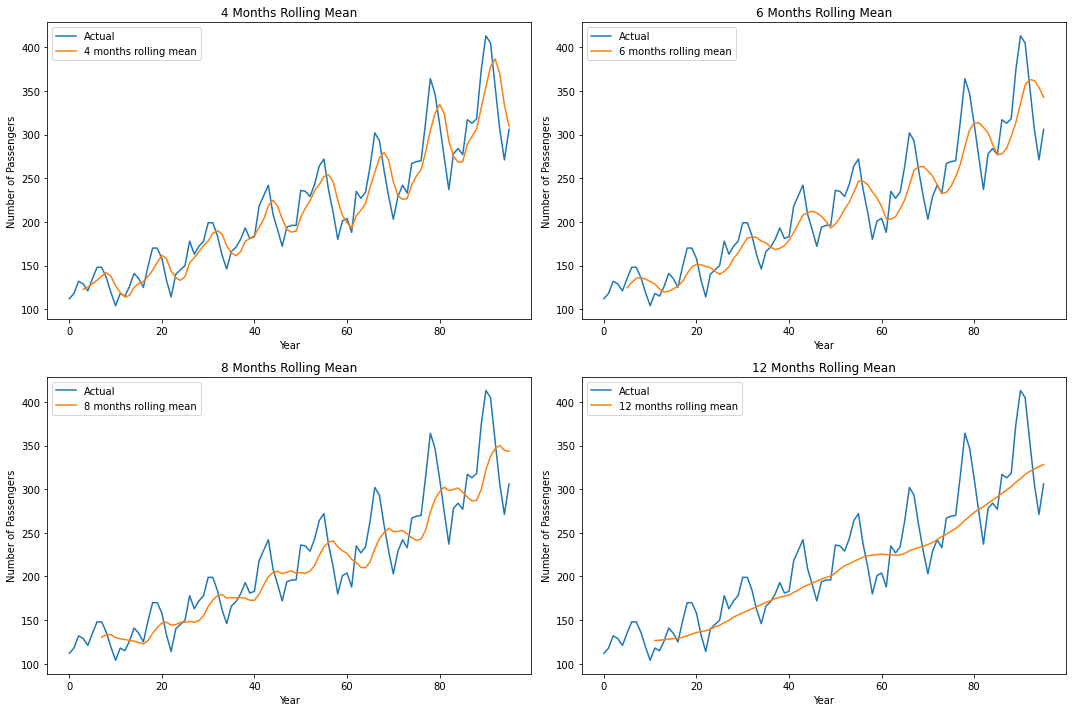

In [11]:
passengers_count = df['Passengers']

fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(df.index,passengers_count,label='Actual')
axes[0][0].plot(df.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(df.index,passengers_count,label='Actual')
axes[0][1].plot(df.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')

axes[1][0].plot(df.index,passengers_count,label='Actual')
axes[1][0].plot(df.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(df.index,passengers_count,label='Actual')
axes[1][1].plot(df.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

The 12 months moving average produces a good wrinkle free curve as required.

# Seasonality

In [12]:
monthly = pd.pivot_table(data=df,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

Year,1955,1956,1957,1958,1959,1960,1961,1962
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


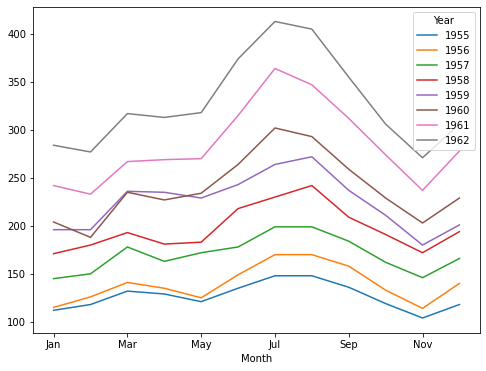

In [13]:
monthly.plot(figsize=(8,6))
plt.show()

In [14]:
yearly = pd.pivot_table(data=df,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1955,112,118,132,129,121,135,148,148,136,119,104,118
1956,115,126,141,135,125,149,170,170,158,133,114,140
1957,145,150,178,163,172,178,199,199,184,162,146,166
1958,171,180,193,181,183,218,230,242,209,191,172,194
1959,196,196,236,235,229,243,264,272,237,211,180,201
1960,204,188,235,227,234,264,302,293,259,229,203,229
1961,242,233,267,269,270,315,364,347,312,274,237,278
1962,284,277,317,313,318,374,413,405,355,306,271,306


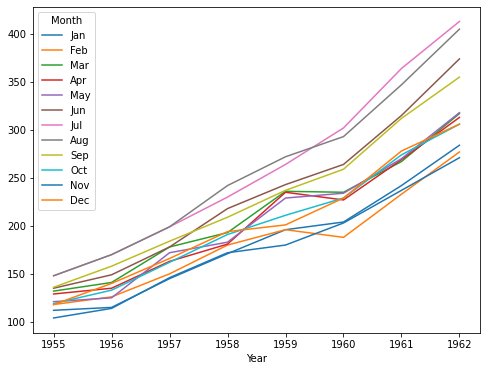

In [15]:
yearly.plot(figsize=(8,6))
plt.show()

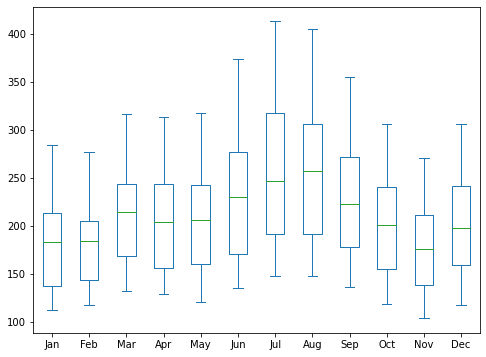

In [16]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

Here we can see that the passengers are increasing every year, especially July and August are the peak months for the passengers
We can see a seasonal cycle of 12 months where the mean of each month starts increasing trend in the beginning of the year and drops down towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

# Building Arima Model 

# Dickey Fuller Test to check the Stationarity

In [17]:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_count)

(1.3402479596467018,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [18]:
adfuller_results = pd.Series(adfuller(passengers_count)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_count)[4].items():
    adfuller_results['Critical Value'+' '+ key] = value
print(adfuller_results)

T stats                    1.340248
p-value                    0.996825
lags used                 12.000000
Number of observations    83.000000
Critical Value 1%         -3.511712
Critical Value 5%         -2.897048
Critical Value 10%        -2.585713
dtype: float64


Here it can be seen that the p value is higher than the 0.05 and the critical values at 1%, 5%, 10% confidence intervals are nowhere near to the test statistics. Thus we can say that our Time Series at the moment is not stationary

# Data Transformation to achieve Stationarity

# Log Transformation

In [19]:
passengers_log = np.log10(passengers_count)

# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_log)
adfuller_results = pd.Series(adfuller(passengers_log)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_log)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)


T stats                   -0.723027
p-value                    0.840695
lags used                 12.000000
Number of observations    83.000000
Critical Value (1%)       -3.511712
Critical Value (5%)       -2.897048
Critical Value (10%)      -2.585713
dtype: float64


The p-value is still greater than 0.05 (Coinfidence Interval 95%) and the critical values at 1%, 5%, 10% confidence intervals are still not near to the test statistics. So we can try differentiating the Time series by 1 and 2 on the log transformation.

# Differentiating by 1 and 2 on the Log Transformation 

In [24]:
log_diff1=passengers_log.diff(1).dropna()
log_diff2=passengers_log.diff(2).dropna()

In [22]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff1)
adfuller_results = pd.Series(adfuller(log_diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.670823
p-value                    0.079225
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [23]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff2)
adfuller_results = pd.Series(adfuller(log_diff2)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff2)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.787629
p-value                    0.060063
lags used                 11.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


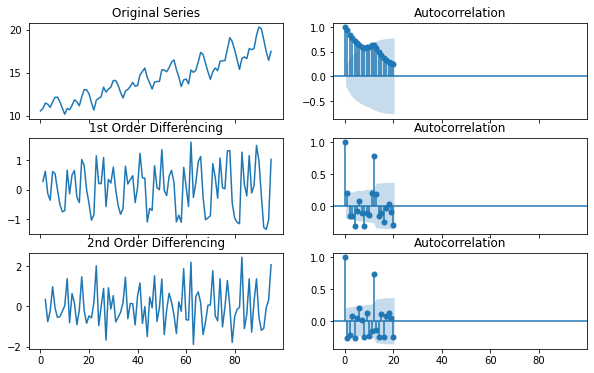

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(passengers_log); axes[0, 0].set_title('Original Series')
plot_acf(passengers_log, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(passengers_log.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(passengers_log.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(passengers_log.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(passengers_log.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

# Time Shift Transformation

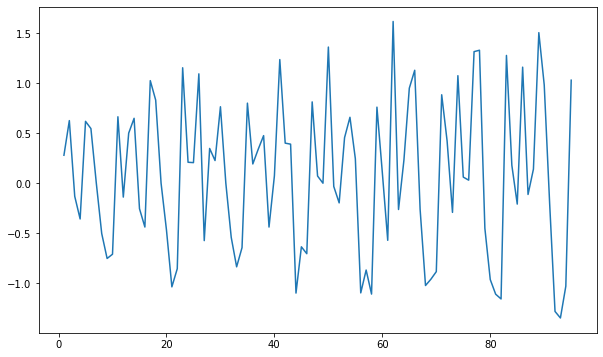

In [33]:
dfLogdiffShifting = passengers_log-passengers_log.shift()
plt.plot(dfLogdiffShifting)

In [34]:
def test_stationary(timeseries):
    
    # Determining rolling statistics
    movingAverage=timeseries.rolling(window=4).mean()
    movingSTD=timeseries.rolling(window=4).std()
    
    #Plotting the rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage,color='red', label='Rolling mean')
    std = plt.plot(movingSTD,color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Means & Rolling standard Deviation')
    plt.show(block=False)
    
    #Performing the Dickey-Fuller Test
    print("Results of dickey Fuller Test:")
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value

    print(dfoutput)

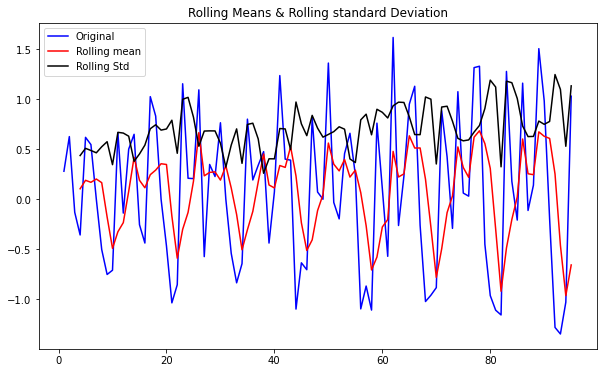

Results of dickey Fuller Test:
Test Statistics                -2.534817
p-value                         0.107231
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [35]:
dfLogdiffShifting.dropna(inplace=True)
test_stationary(dfLogdiffShifting)

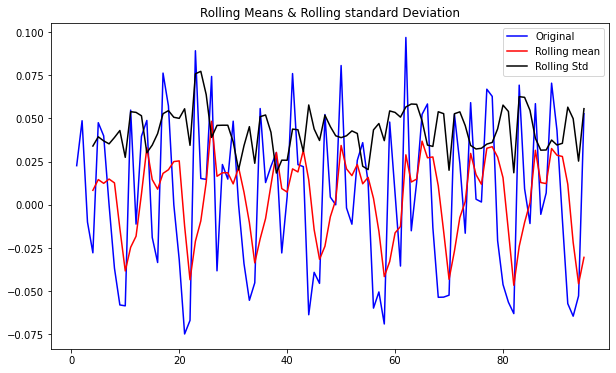

Results of dickey Fuller Test:
Test Statistics                -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [36]:
test_stationary(log_diff1)

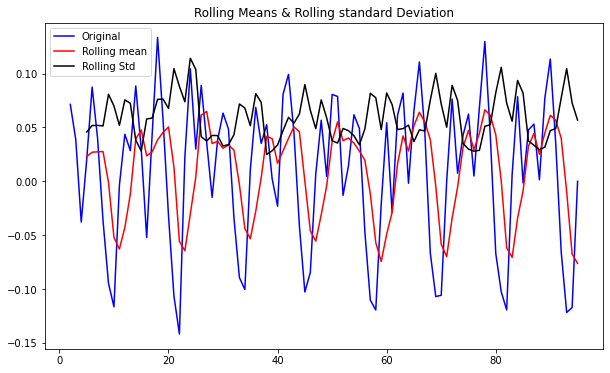

Results of dickey Fuller Test:
Test Statistics                -2.787629
p-value                         0.060063
#Lags Used                     11.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [37]:
test_stationary(log_diff2)

# Hyperparamter Tuning for finding the best p,q and d values and building a good model for future predictions

In [53]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(log_diff2, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-409.681, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-366.509, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-390.364, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-409.382, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-368.440, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-409.633, Time=0.74 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-407.023, Time=1.38 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-395.240, Time=0.39 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=-405.885, Time=0.65 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-412.015, Time=0.29 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-388.596, Time=0.22 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   94
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood                 212.435
Date:                              Tue, 26 Apr 2022   AIC                           -416.871
Time:                                      15:30:46   BIC                           -407.244
Sample:                                           0   HQIC                          -413.005
                                               - 94                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5544      0.139      3.994      0.000       0.282       0.826
ma.L2         -0.3748      0.142     -2.644      0.008      -0.653      -0.097
ma.S.L12      -0.6153      0.137     -4.507      0.000      -0.883      -0.348
sigma2         0.0003   4.95e-05      6.009      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.72   Prob(JB):                         0.88
Heteroskedasticity (H):               0.40   Skew:                            -0.05
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

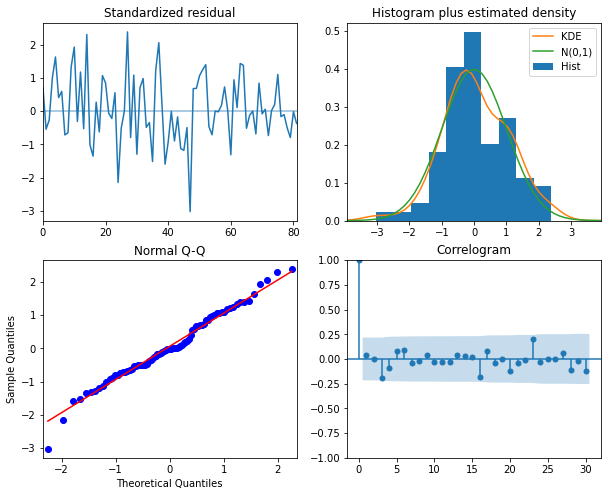

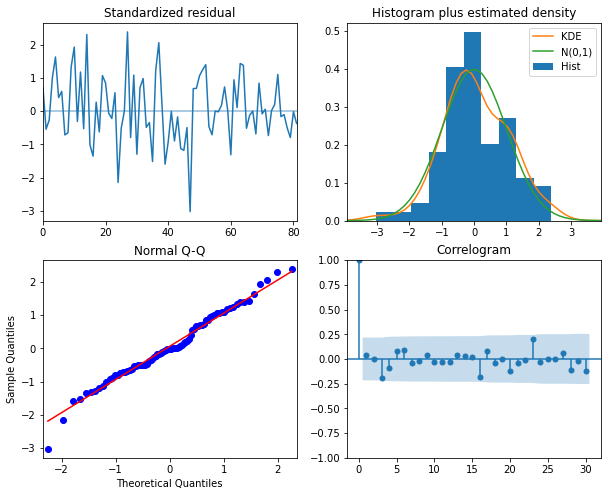

In [65]:
smodel.plot_diagnostics(lags=30,figsize=(10,8))

1. The KDE plot of the residuals on the top right is almost similar with the normal distribution.
2. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution. Again, this is a strong indication that the residuals are normally distributed.
3. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

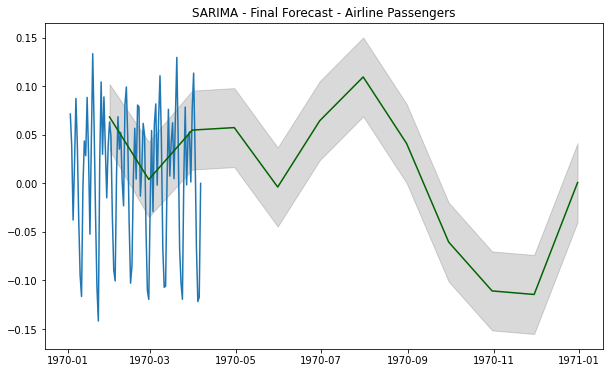

In [74]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(log_diff2.index[-1], periods = n_periods,freq='M')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(log_diff2)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast - Airline Passengers")
plt.show()

Finally, overall this seems like a good fit as shown in the figure above